# Config

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches



In [2]:
YEAR = 2023

# Read Data

In [3]:
gdf = gpd.read_parquet(f'../data/municipal_imd_{YEAR}.parquet')
print(gdf.shape)
print(gdf.columns)

(18564, 11)
Index(['code_segment', 'geometry', 'code_street', 'name_street', 'direction',
       'ab_carril', 'ba_carril', 'ab_flow', 'ba_flow', 'total_flow', 'angle'],
      dtype='object')


# Process data


In [4]:
# get only last year 
gdf = gdf.to_crs(epsg=4326)

In [5]:
gdf.columns
gdf[[ 'ab_carril', 'ba_carril']].fillna(0, inplace=True)
gdf['lanes'] = gdf['ab_carril'] + gdf['ba_carril']
gdf['lanes'].describe()

/tmp/ipykernel_35553/2475968479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf[[ 'ab_carril', 'ba_carril']].fillna(0, inplace=True)


count    3298.000000
mean        2.363250
std         0.818875
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: lanes, dtype: float64

# Metrics

In [6]:
gdf['total_flow'].describe()

count     18564.000000
mean       6151.398195
std       11574.441207
min           0.000000
25%         353.193787
50%        1314.176960
75%        6938.691078
max      110723.366082
Name: total_flow, dtype: float64

# Visualize data

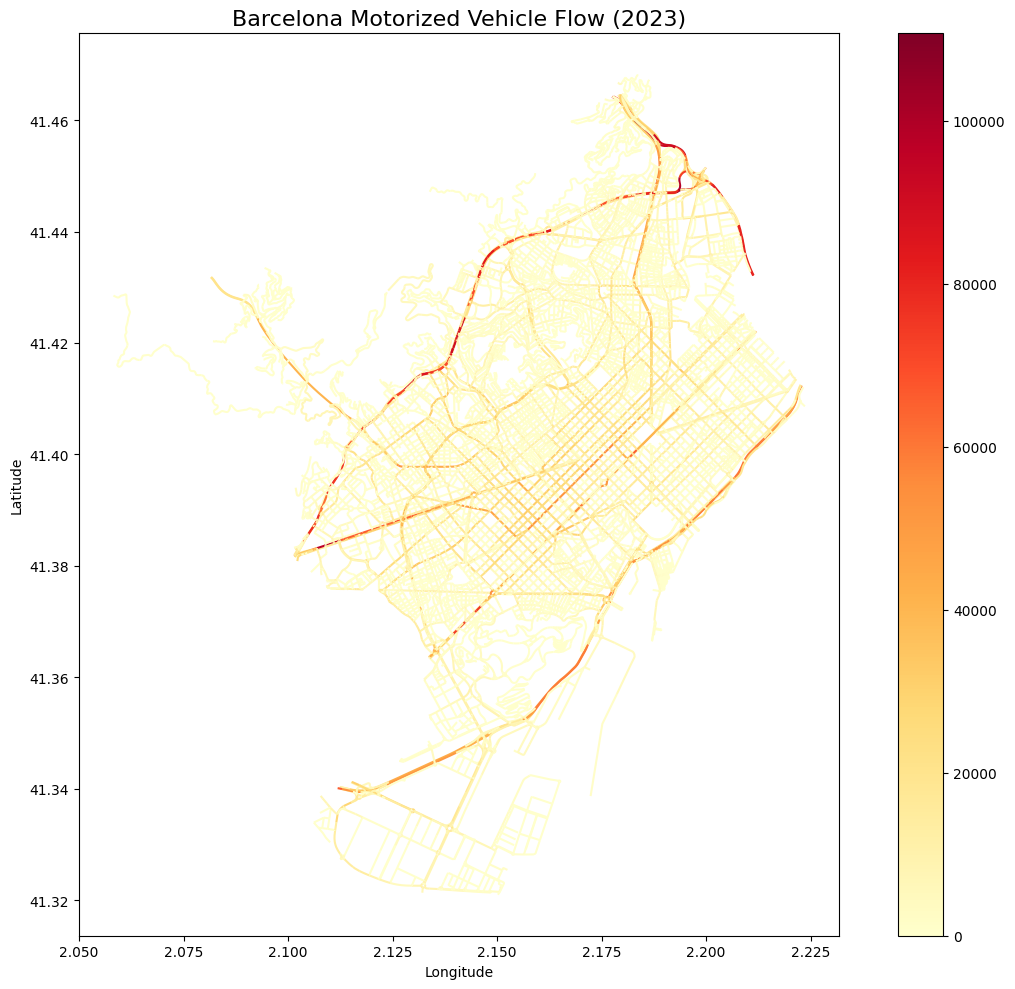

In [18]:

gdf.plot(
    column='total_flow',
    legend=True,
    figsize=(12, 10),
    markersize=5,
    cmap='YlOrRd'
)
plt.title('Barcelona Motorized Vehicle Flow (2023)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# Save data



In [19]:
gdf.to_crs(epsg=4326, inplace=True)  # Convert to WGS84 for GeoJSON compatibility
gdf.to_file(
    f"../data/imd_motorized_{YEAR}.geojson", driver='GeoJSON', index=False)
